# <font color = blue> Exploratory Data Analysis:</font>
## Analysis of the Titanic disaster

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab as pl
from pandas.plotting import scatter_matrix
from scipy import stats
sns.set_style("whitegrid")
import missingno
%matplotlib inline

## Imporing and Reading the Data

In [158]:
titanic = pd.read_csv('Titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* Ticket: Ticket number.
* Fare: Passenger fare.
* Cabin: Cabin number.

* Embarked: Port of Embarkation:    
  <font color =blue>C = Cherbourg</font>  
  <font color =green>Q = Queenstown</font>  
 <font color =red> S = Southampton</font>  

In [159]:
titanic.shape
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


A bird eye's view of out Titanic data set.It consists of 891 rows and 12 columns.The data consists of initegers, decimals and objective data types.

In [160]:
pd.set_option('display.max_columns',12)

<AxesSubplot: >

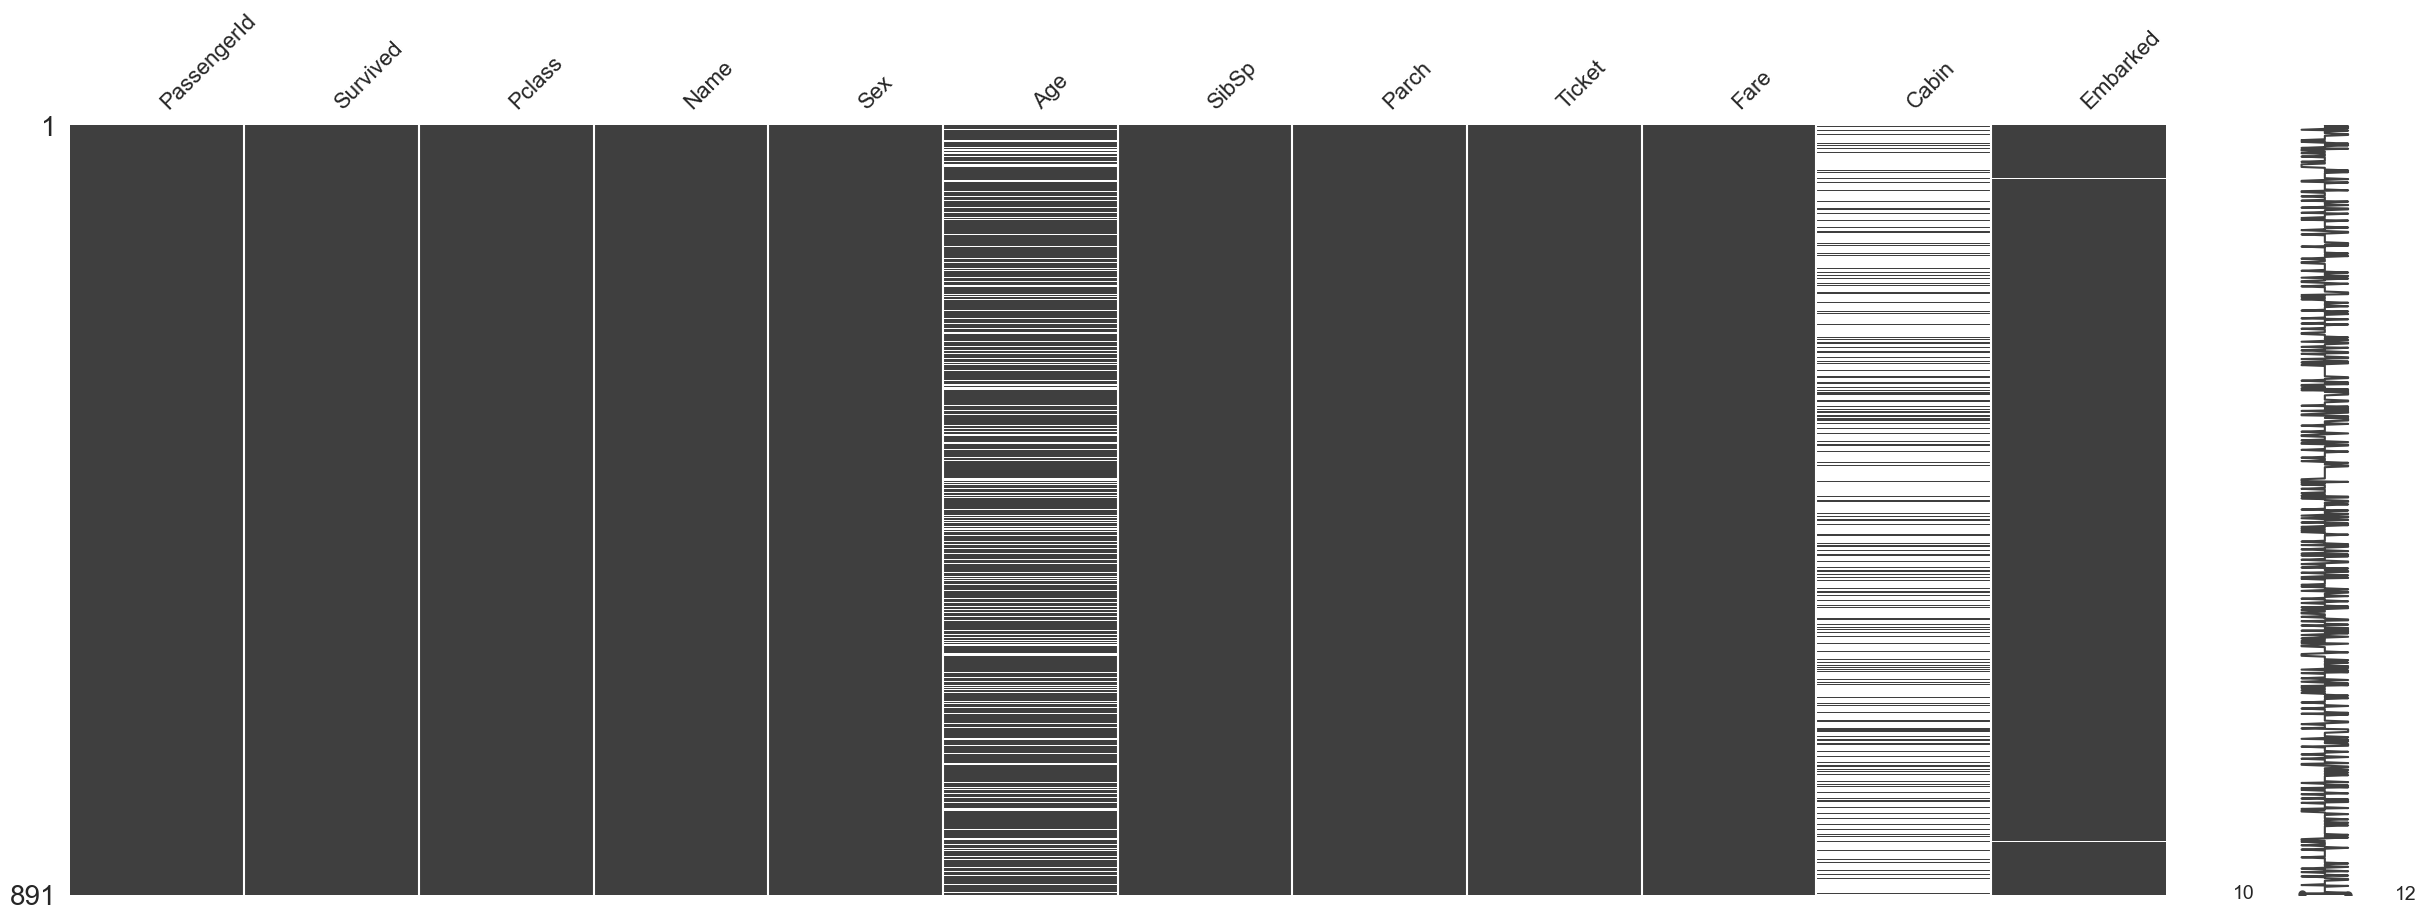

In [161]:
# Plot graphic of missing values
missingno.matrix(titanic, figsize = (30,10))

We can see that the 'Age' column has a high number of missing values. As well as our 'Cabin' column.

In [162]:
# get the number of missing data points per column
missing_values_count = titanic.isnull().sum()
missing_values_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there are 687/891 (77%) values missing from the cabin number column. As this is most likely not a particularly useful piece of information anyway, we can simply drop the whole column.

Age however is a much more useful variable in the current analysis, yet we are missing 177/891 (20%) values. We will most likely have to omit these rows when analyzing any relationships with age as it would be difficult to replace these missing values accurately and without biasing the distribution.

Embarked location is missing only 2 values so we can simply omit those two rows for the analysis without losing much information.

Although there are no missing values, we can also drop the columns 'Passenger Id', 'Name' and 'Ticket' as these are all nominal categorical variables that will not help us to analyses trends in the dataset.

In [163]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 Above we can see a very nice overall depiction of the 'Titanic data set.
 For example looking at the 'Age column':
   * The mean age onboard was just 29 years
   * The standard deviation for siblings onboard was 1 sibling.
  * The max number was 3.
   * The maximum age onboard was 80 years of age and the youngest was 0.42 years (months old baby)
   * The mean for survival was 0.38 which is very shocking.
   * In the 50 percentile the survival rate was 3

# <font color = blue> Now for Visualization of our Data</font>

###  Overall survival of passengers.

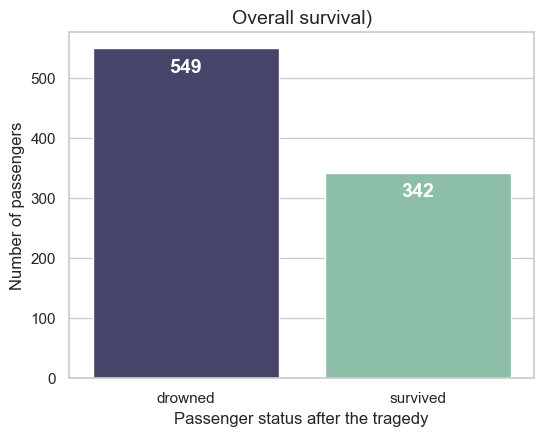

In [164]:
# set size of the plot
plt.figure(figsize=(6, 4.5)) 

# countplot shows the counts of observations in each categorical bin using bars.
# x - name of the categorical variable
ax = sns.countplot(x = 'Survived', data = titanic, palette=["#3f3e6fd1", "#85c6a9"])

# set the current tick locations and labels of the x-axis.
plt.xticks( np.arange(2), ['drowned', 'survived'] )
# set title
plt.title('Overall survival)',fontsize= 14)
# set x label
plt.xlabel('Passenger status after the tragedy')
# set y label
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (titanic['Survived'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

Here we can see that out of a total of 891 passengers a total of only 342 passengers survived the disaster that is a mere 38%. The percentage of passengers that did not survive the disaster was a staggering 61%

male      577
female    314
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Male vs Female Passeners')

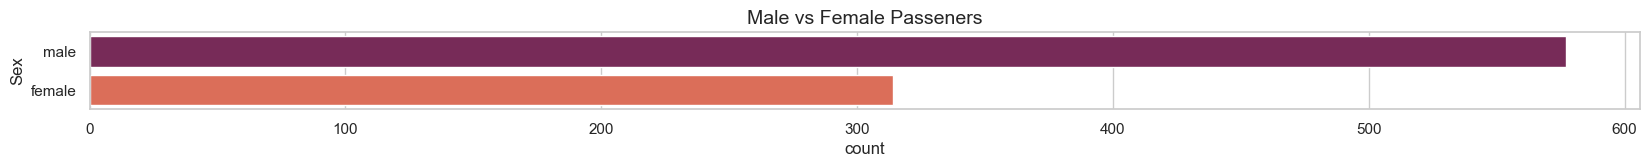

In [174]:
# How many passengers are Male and Female
fig = plt.figure(figsize=(20,1))

sns.countplot(y='Sex', data=titanic, palette='rocket');
print(titanic.Sex.value_counts())
plt.title('Male vs Female Passeners',fontsize=14)

Here we can see that of the 891 passengers 577 were male and 314 passengers were female.

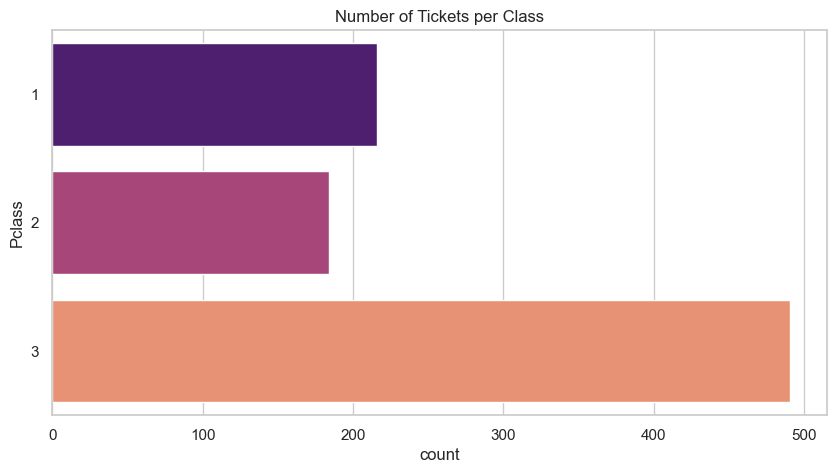

In [175]:
# figure showing the relationship between class tickets 'PClass'

fig = plt.figure(figsize=(10,5))
plt.title('Number of Tickets per Class')
sns.countplot(y=titanic['Pclass'], data=titanic, palette='magma');

As expected a higher number of tickets were for 3rd class passengers.

## Looking at survival rate per Class:

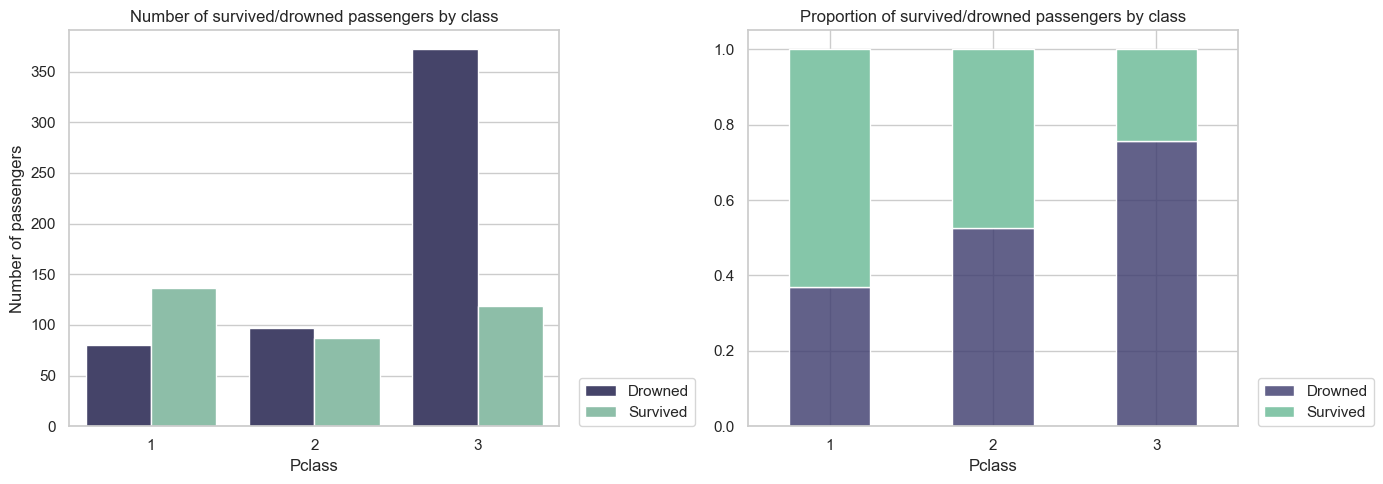

In [167]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic, palette=["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Number of survived/drowned passengers by class')
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax2 = fig.add_subplot(122)
d = titanic.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax2, color =["#3f3e6fd1", "#85c6a9"])
plt.title('Proportion of survived/drowned passengers by class')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()

The number of passengers surviving vs the proportion of passengers survived per Class. As it was depicted in the movie from the graphs we can conclude that it looks like 1st class passengers had a higher rate of survival compared to the 3rd class passengers.Therefore, a higher proportion of 1st class passengers survived compared to 3rd class passengers.

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

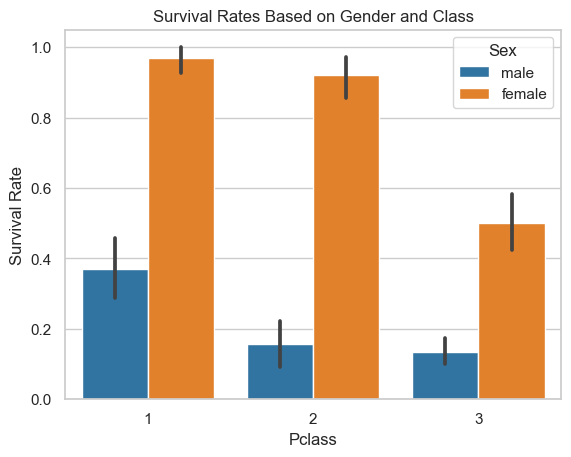

In [177]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic, palette='tab10')
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Based on gender, and Class, here we can conclude that a higher proportion of female passengers survived in every class. With the lowest proportion of female passengers surviving came from the 3rd class. We can also see that the highest proportion of male passengers survived were from the 1st class.

## Looking at survival rate per Age category:

Text(0.5, 1.0, 'Survived grouped by Age category')

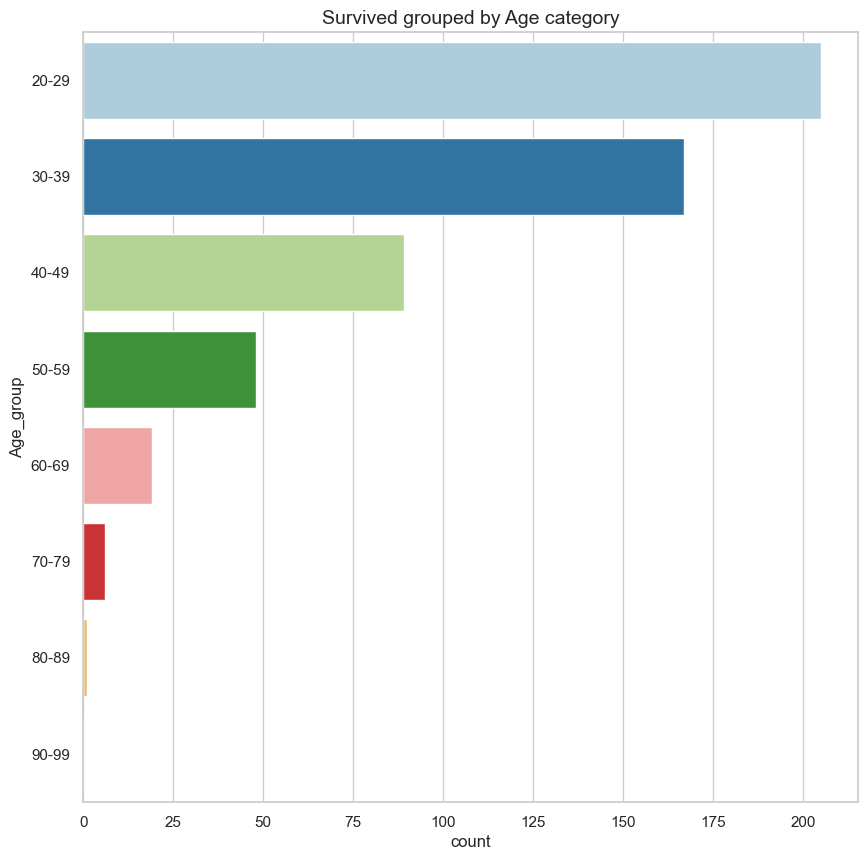

In [185]:
# Grouping the Age variable
titanic['Age_group'] = pd.cut(titanic['Age'], [20, 29, 39,49, 59,69,79,89,99], 
                   labels=['20-29', '30-39', '40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

fig = plt.figure(figsize=(10,10))
sns.countplot(y=titanic['Age_group'], data=titanic, palette='Paired');
plt.title('Survived grouped by Age category', fontsize=14)

Here we can see that almost 75% of total passengers survived were younger than 40 years of age. Giving the picture of children first and not necessarily older people first. The majority of people on the titanic were below the age of 50, thus there were  not that many older people onboard.

## Embarked, survival rate per Port:

c:\Users\Lucille\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\Lucille\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


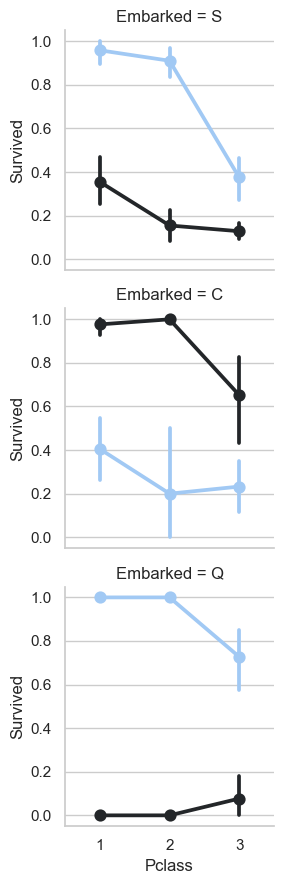

In [170]:
fg = sns.FacetGrid(titanic, row='Embarked')
##Above statement creates one row of graphs for each unique value of 'Embarked'. We have 
##to specify what data we need. This is done below
fg.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',data=titanic,hue='Sex')


<AxesSubplot: xlabel='Embarked', ylabel='Pclass'>

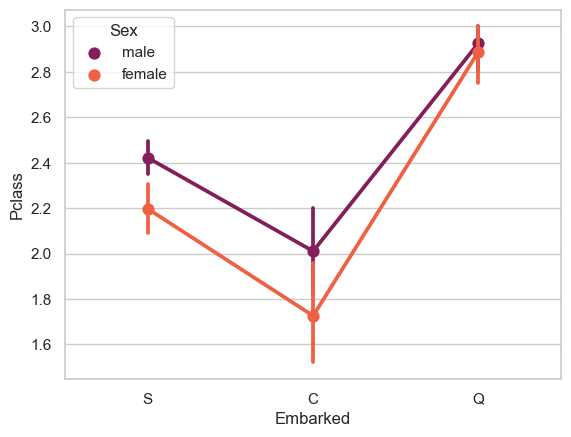

In [179]:
sns.pointplot(data=titanic, x="Embarked", y="Pclass", hue="Sex",palette='rocket')

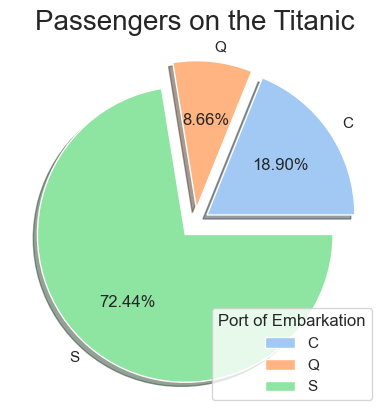

In [172]:
# calculate number of passengers from each port
group_by_embarked = titanic.groupby(['Embarked']).size()
group_by_embarked
# display proportions of customers from each port
fig_embarked_1, ax = plt.subplots()
ax.pie(group_by_embarked, labels=group_by_embarked.index.tolist(), autopct='%1.2f%%', shadow=True, explode=(0.1, 0.1, 0.1))
plt.legend(title = 'Port of Embarkation',loc='lower right')
plt.title('Passengers on the Titanic', fontsize=20)

plt.show()

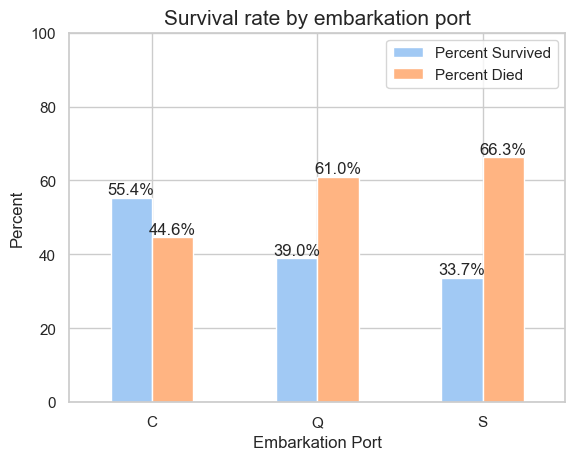

In [183]:
# calculate number of passengers that survived from each port
embarked_survival = titanic.groupby(['Embarked'])['Survived'].sum()

# subtract from total embarked to calculate death toll from each port
embarked_death_toll = group_by_embarked.sub(embarked_survival)

# calculate percentages of survival and death for each port
embarked_survival_pct = embarked_survival.div(group_by_embarked) * 100
embarked_death_pct = embarked_death_toll.div(group_by_embarked) * 100

# create new dataframe of set of calculated survival percentages
embarked_df = pd.DataFrame({'Percent Survived': embarked_survival_pct, 'Percent Died': embarked_death_pct})

# display results in bar chart
fig_embarked_2, ax = plt.subplots()
ax_0 = embarked_df.plot(ax=ax, kind='bar', xlabel="Embarkation Port", ylabel="Percent", rot=0)
plt.title('Survival rate by embarkation port', fontsize=15)

# add labels to each bar
for i in ax_0.containers:
    # set the bar label as percentage with 1dp
    ax_0.bar_label(i, fmt='%.1f%%', label_type='edge')

# set y axis limits
ax.set_ylim([0, 100])

plt.show()